<h1>Import Libraries</h1>

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr 

In [11]:
# import dataset              
df = pd.read_csv('/Users/sanketbhiogade/Documents/EDA_Ecommerce-Sales/Dataset/Superstore_US.csv')

In [3]:

df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Unnamed: 20,Unnamed: 21
0,CA-2016-1521561,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,NaN,NaN
1,CA-2016-1521562,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,NaN,NaN
2,CA-2016-1386883,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,NaN,NaN
3,US-2015-1089664,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,NaN,NaN
4,US-2015-1089665,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,NaN,NaN


<h1>Data Cleaning</h1>

Handling Missing Values

In [5]:

df.drop('Unnamed: 20', axis=1, inplace=True)
df.drop('Unnamed: 21', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Check for duplicate Order ID
duplicate_orderid = df['Order_ID'].duplicated().sum()
print(f"Number of duplicate Row_ID: {duplicate_orderid}")

Number of duplicate Row_ID: 0


Changing Data Type

In [7]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d-%m-%Y')

Consistency Checks

In [9]:
# Checking unique value for Ship Mode
print(df['Ship_Mode'].unique())

# Checking unique value for Segement
print(df['Segment'].unique())

# Checking unique value for Region
print(df['Region'].unique())

# Checking unique value for Category
print(df['Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']


<h1>Exploratory Data Analysis</h1>

Get descriptive statistics summary


In [16]:
df.describe(include = "all")

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Unnamed: 20,Unnamed: 21
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,...,9993,9993,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,0.0,0.0
unique,9993,1237,1334,4,793,793,3,1,531,49,...,1862,3,17,1850,NaN,NaN,NaN,NaN,NaN,NaN
top,CA-2016-1521561,05-09-2016,16-12-2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,...,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,38,35,5967,37,37,5191,9993,915,2001,...,19,6026,1523,48,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,229.852846,3.789753,0.156188,28.660971,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,623.276074,2.225149,0.206457,234.271476,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.731000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54.480000,3.000000,0.200000,8.671000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000,NaN,NaN


In [14]:
descriptive_stats = df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()
descriptive_stats

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Distribution Analysis


Histogram

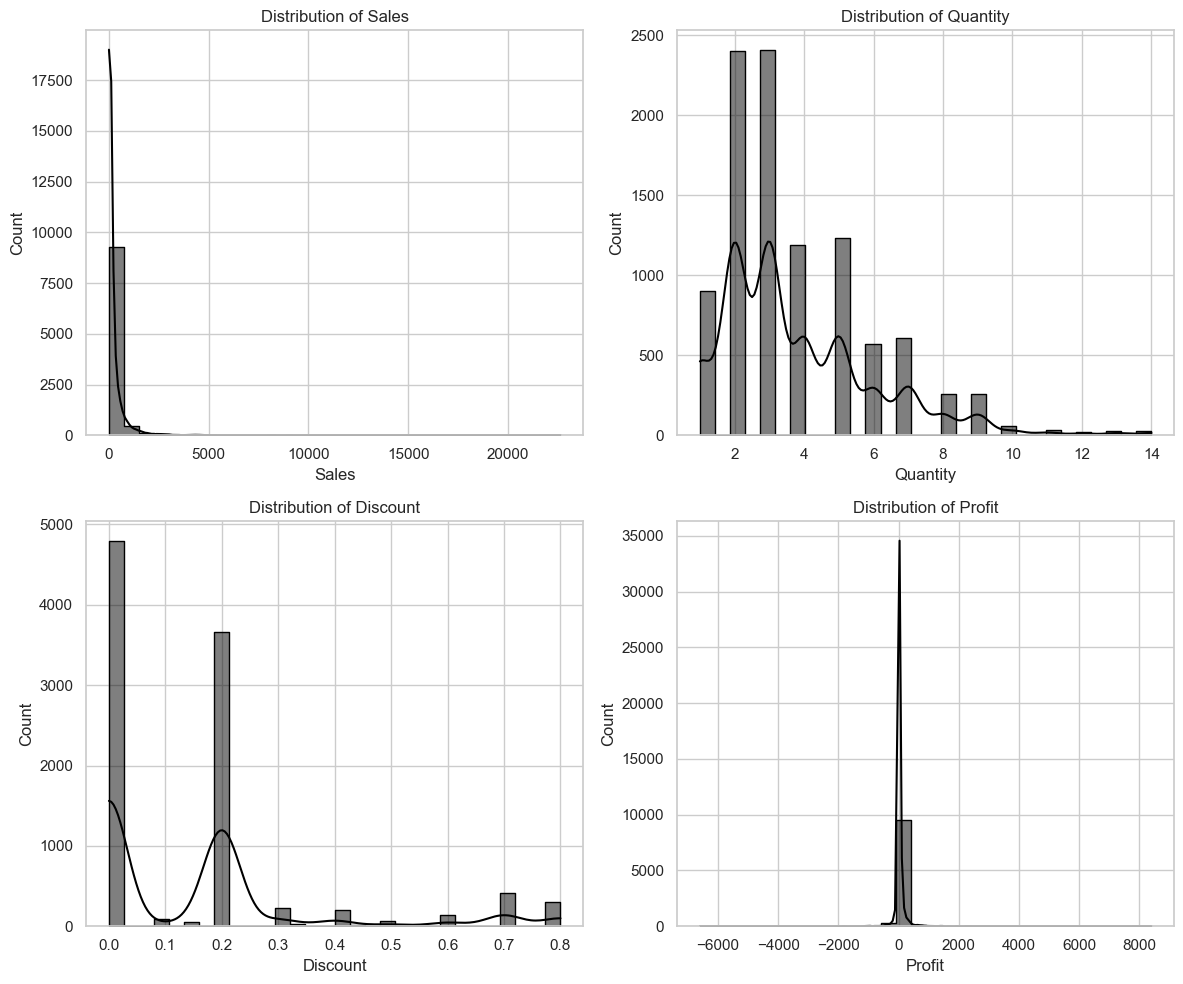

In [28]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Sales
sns.histplot(x="Sales", data=df, bins=30, kde=True, element="step", color="black", ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Sales")

# Histogram for Quantity
sns.histplot(x="Quantity", data=df, bins=30, kde=True, element="step", color="black", ax=axs[0, 1])
axs[0, 1].set_title("Distribution of Quantity")

# Histogram for Discount
sns.histplot(x="Discount", data=df, bins=30, kde=True, element="step", color="black", ax=axs[1, 0])
axs[1, 0].set_title("Distribution of Discount")

# Histogram for Profit
sns.histplot(x="Profit", data=df, bins=30, kde=True, element="step", color="black", ax=axs[1, 1])
axs[1, 1].set_title("Distribution of Profit")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Density Plots

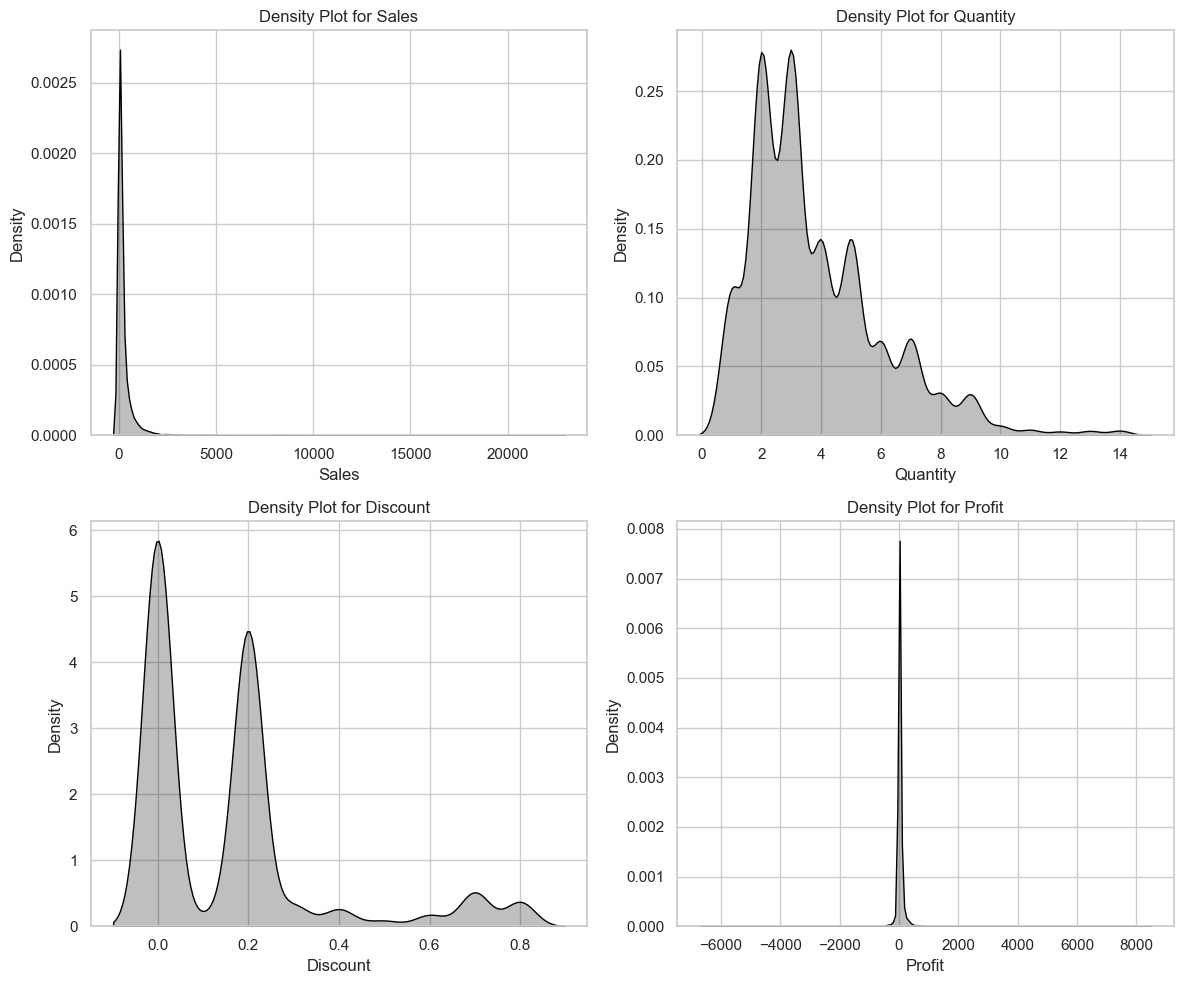

In [32]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Density Plot for Sales
sns.kdeplot(x="Sales", data=df, fill=True, color="black", ax=axs[0, 0])
axs[0, 0].set_title("Density Plot for Sales")

# Density Plot for Quantity
sns.kdeplot(x="Quantity", data=df, fill=True, color="black", ax=axs[0, 1])
axs[0, 1].set_title("Density Plot for Quantity")

# Density Plot for Discount
sns.kdeplot(x="Discount", data=df, fill=True, color="black", ax=axs[1, 0])
axs[1, 0].set_title("Density Plot for Discount")

# Density Plot for Profit
sns.kdeplot(x="Profit", data=df, fill=True, color="black", ax=axs[1, 1])
axs[1, 1].set_title("Density Plot for Profit")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Box Plot

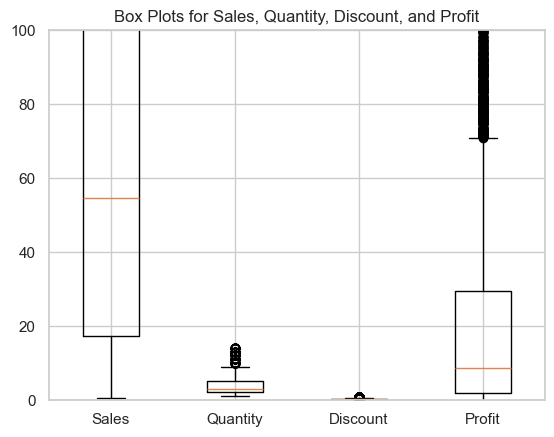

In [44]:
df_melted = pd.melt(df, var_name="variable", value_name="value")
plt.boxplot([df_melted[df_melted['variable'] == var]['value'] for var in ["Sales", "Quantity", "Discount", "Profit"]])
plt.xticks([1, 2, 3, 4], ["Sales", "Quantity", "Discount", "Profit"])
plt.title("Box Plots for Sales, Quantity, Discount, and Profit")
plt.xlim(0.5, 4.5)  
plt.ylim(0, 100)  
plt.show()

Cumulative Distribution Functions

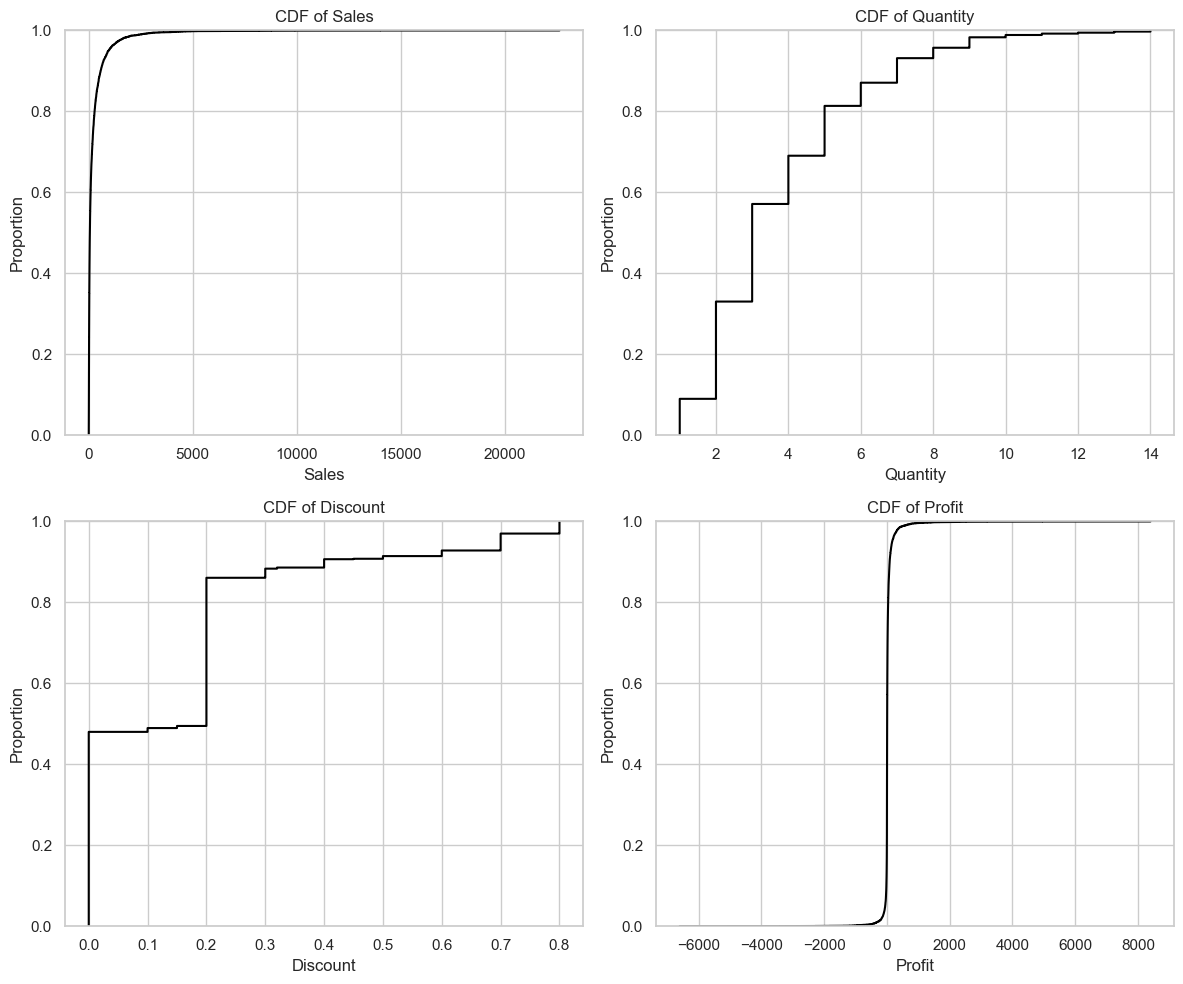

In [47]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.ecdfplot(x='Sales', data=df, ax=axs[0, 0], color='black')
axs[0, 0].set_title('CDF of Sales')

sns.ecdfplot(x='Quantity', data=df, ax=axs[0, 1], color='black')
axs[0, 1].set_title('CDF of Quantity')

sns.ecdfplot(x='Discount', data=df, ax=axs[1, 0], color='black')
axs[1, 0].set_title('CDF of Discount')

sns.ecdfplot(x='Profit', data=df, ax=axs[1, 1], color='black')
axs[1, 1].set_title('CDF of Profit')

plt.tight_layout()
plt.show()

Categorical Variables

Ship Mode

In [57]:
print("Count for Ship Mode:\n", df['Ship_Mode'].value_counts())

Count for Ship Mode:
 Ship_Mode
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


Segment

In [49]:
print("\nCount for Segment:\n", df['Segment'].value_counts())


Count for Segment:
 Segment
Consumer       5191
Corporate      3020
Home Office    1782
Name: count, dtype: int64


State

In [56]:
print("\nCount for State:\n", df['State'].value_counts())


Count for State:
 State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     468
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina    

Regoin

In [55]:
print("\nCount for Regoin:\n", df['Region'].value_counts())


Count for Regoin:
 Region
West       3203
East       2847
Central    2323
South      1620
Name: count, dtype: int64


Category

In [54]:
print("\nCount for Category:\n", df['Category'].value_counts())


Count for Category:
 Category
Office Supplies    6026
Furniture          2120
Technology         1847
Name: count, dtype: int64


Sub Category

In [53]:
print("\nCount for Sub Category:\n", df['Sub_Category'].value_counts())


Count for Sub Category:
 Sub_Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


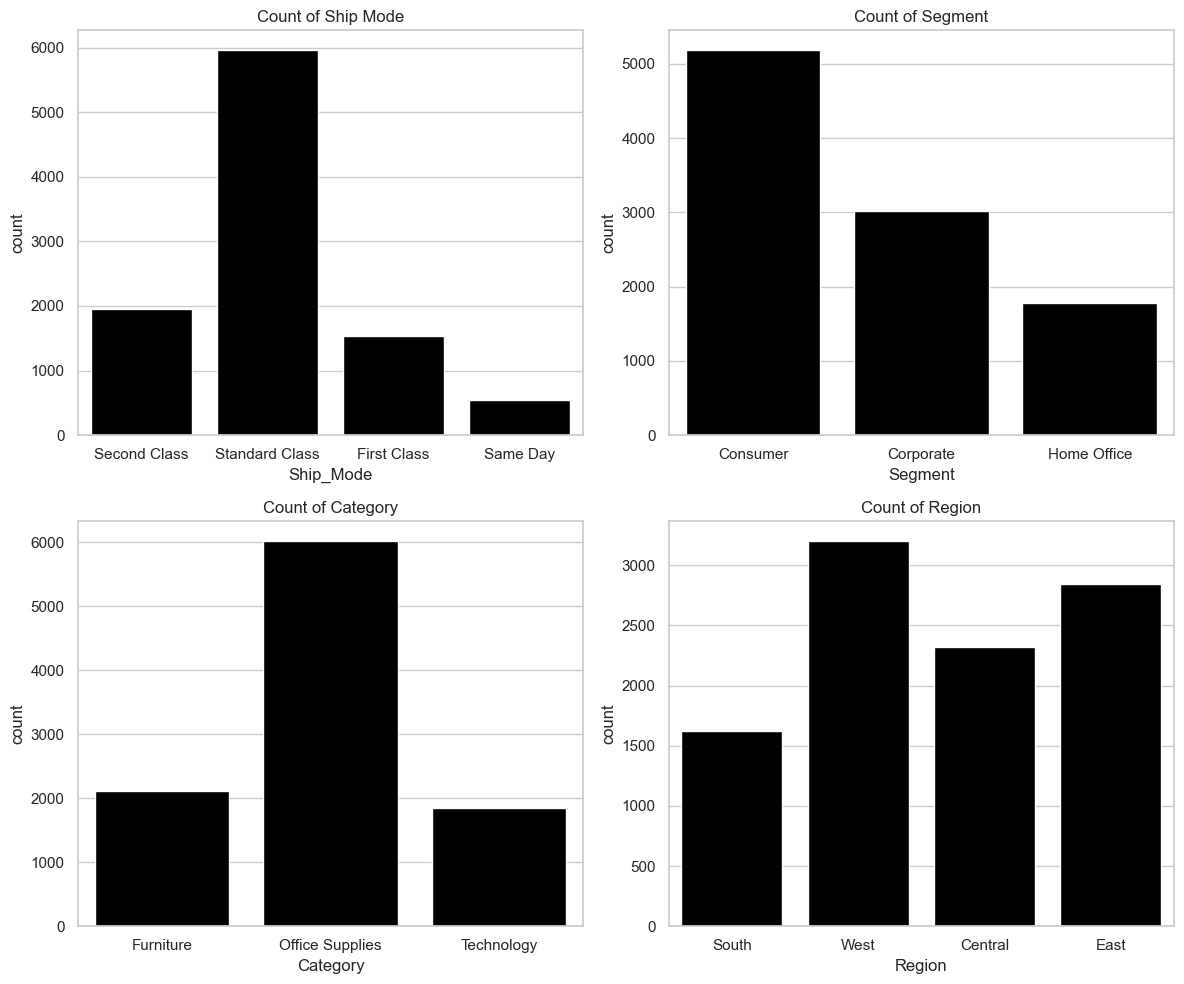

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x="Ship_Mode", data=df, ax=axs[0, 0], color='black')
axs[0, 0].set_title("Count of Ship Mode")

sns.countplot(x="Segment", data=df, ax=axs[0, 1], color='black')
axs[0, 1].set_title("Count of Segment")

sns.countplot(x="Category", data=df, ax=axs[1, 0], color='black')
axs[1, 0].set_title("Count of Category")

sns.countplot(x="Region", data=df, ax=axs[1, 1], color='black')
axs[1, 1].set_title("Count of Region")

plt.tight_layout()
plt.show()